Walmart Business Case study - CLT

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
#from scipy.stats import poisson
#from scipy.stats import expon
#from scipy.stats import geom
import math as m

In [ ]:
#import the dataset
df=pd.read_csv('walmart_data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'walmart_data.csv'

In [ ]:
len(df)

550068

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#1.Check usual data analysis
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df['Purchase_Amount']=df['Purchase']

In [ ]:
df.drop(['Purchase'],axis=1,inplace=True)

In [ ]:
df['User_ID'].nunique()

5891

In [ ]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Marital_Status'].unique()

array([0, 1])

In [ ]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [ ]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df['Product_ID'].nunique()

3631

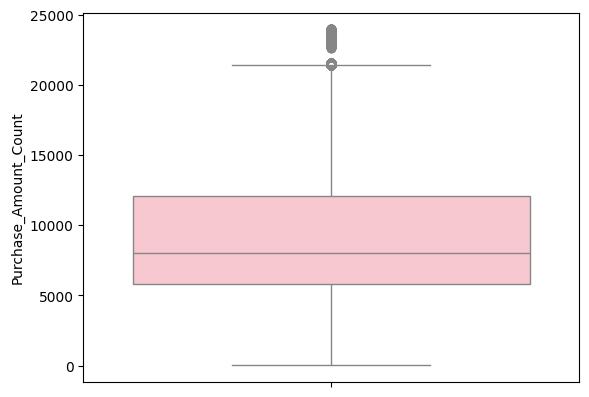

In [ ]:
#2a To check the what is the purchase amount of coustomers and whcih amount are outliers
sns.boxplot(y=df["Purchase_Amount"],color='pink')
plt.ylabel('Purchase_Amount_Count')
plt.show()

From the above graph,it is showing 50% of the customer's purchase amount is between 5000 and 12000.And above 22000 is the outlier

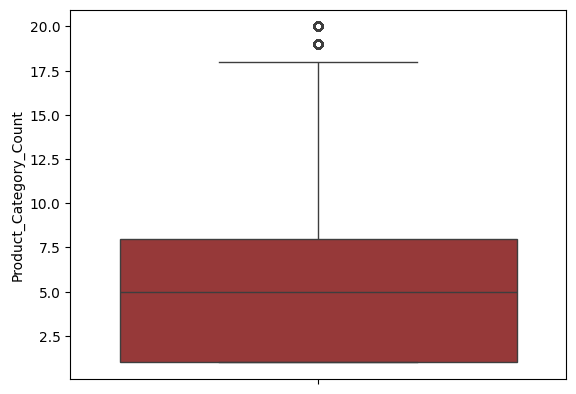

In [ ]:
#2a To check the which Product_Category is purchase by  coustomers and whcih Product_Category are outliers
sns.boxplot(y=df["Product_Category"],color='brown')
plt.ylabel('Product_Category_Count')
plt.show()

From the above graph,it is showing 50% of the customer purchased the product category between 1 and 8.And product category 19 & 20 are the outliers

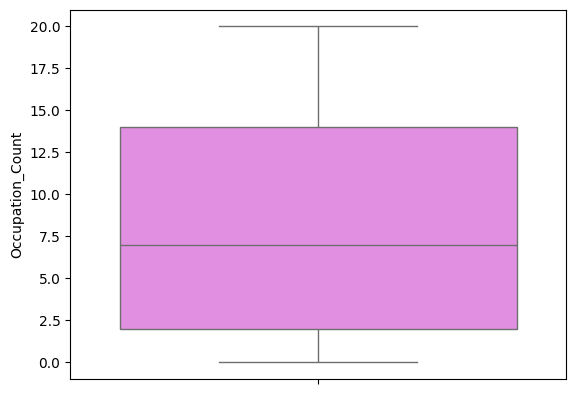

In [ ]:
#2a To find which occupation's possess customer puchased more
sns.boxplot(y=df["Occupation"],color='violet')
plt.ylabel('Occupation_Count')
plt.show()

From the above graph,it is showing 50% of the customer's occupation is 2 and 14.And there is no outliers in occupation

In [ ]:
df_age['Product_Category_count'] = df.groupby(['Age','Product_Category'])[['Product_Category']].count()
df_age

Product_Category  Product_Category_count
Age  Product_Category                                          
0-17 1                             3585                    3585
     2                              805                     805
     3                             1200                    1200
     4                              758                     758
     5                             4330                    4330
...                                 ...                     ...
55+  16                             377                     377
     17                              67                      67
     18                             241                     241
     19                             103                     103
     20                             160                     160

[140 rows x 2 columns]

In [ ]:
df_age.drop(['Product_Category'],axis=1,inplace=True)

In [ ]:
df_age.reset_index()

,Age,Product_Category,Product_Category_count
0,0-17,1,3585
1,0-17,2,805
2,0-17,3,1200
3,0-17,4,758
4,0-17,5,4330
...,...,...,...
135,55+,16,377
136,55+,17,67
137,55+,18,241
138,55+,19,103


<Axes: xlabel='Age', ylabel='Product_Category_count'>

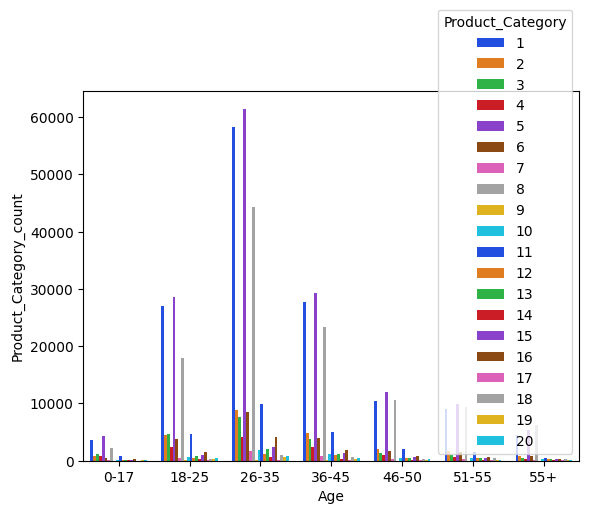

In [ ]:

#3a To check which product category is mostly puchased and which age group is the major customers
sns.barplot(data=df_age, x='Age',y='Product_Category_count',hue='Product_Category',palette='bright')

From the above graph,we can clearly see product category 1,5,8 are the most purchased product category.And the majority of the customers are in the age between 26 to 35

In [ ]:
df_gender=df.groupby(['Product_Category','Gender'])[['Gender']].count()

In [ ]:
df_gender.drop(['Gender'],axis=1,inplace=True)

<Axes: xlabel='Gender', ylabel='Gender_count'>

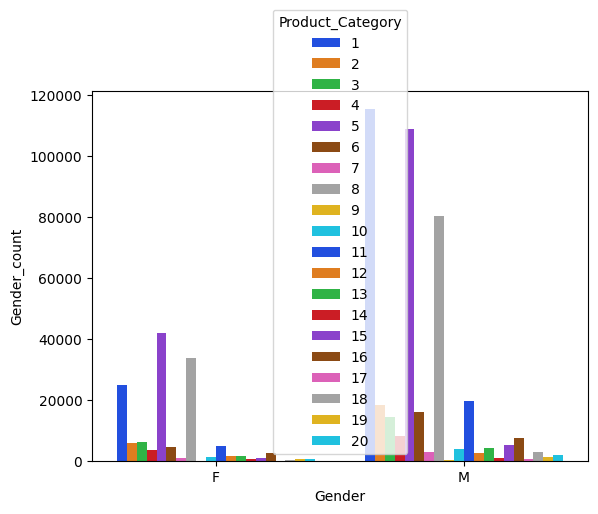

In [ ]:
#3c to check gender is influced in choosing product category
#sns.barplot(data=df_gender, x='Product_Category',y='Gender',hue='Gender_count',palette='bright')
sns.barplot(data=df_gender, x='Gender',y='Gender_count',hue='Product_Category')

From the above graph we can see Male purchased more than female.product category

In [ ]:
#3b To check which whether age and marital status
df_age_maitial=df.groupby(['Marital_Status','Age'])[['Purchase_Amount']].sum()

In [ ]:
df_age_maitial.reset_index()

,Marital_Status,Age,Purchase_Amount
0,0,0-17,134913183
1,0,18-25,723920602
2,0,26-35,1233330102
3,0,36-45,624110760
4,0,46-50,113658360
5,0,51-55,103792394
6,0,55+,75202046
7,1,18-25,189928073
8,1,26-35,798440476
9,1,36-45,402459124


<Axes: xlabel='Marital_Status', ylabel='Purchase_Amount'>

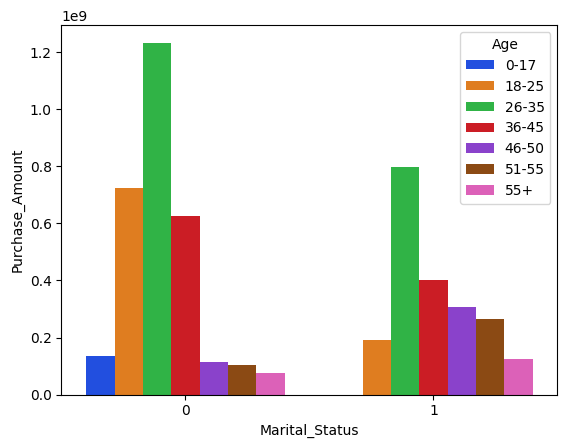

In [ ]:
#3b To check which whether age and marital status
sns.barplot(data=df_age_maitial, x='Marital_Status',y='Purchase_Amount',hue='Age',palette='bright')

From the above graph we can see Unmarried people done more purchase than married people,And age between 26 to 35 have done more purchase irresepective of marital status

**4.Gender affect the amount spent**

In [ ]:
df_male=df[df['Gender']=='M']
df_male.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase_Amount
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [ ]:
df_male.shape

(414259, 10)

In [ ]:
df_M_Puramt=df_male['Purchase_Amount']

In [ ]:
# mean of the entire population
mu = df_M_Puramt.mean()
mu

9437.526040472265

In [ ]:
# Standard Deviation of the entire population
sigma = df_M_Puramt.std()
sigma

5092.18620977797

We will now randomly select 300 samples and determine the average purchase amount of these samples

**CLT for sample size 300 - Male**

In [ ]:
np.mean(df_M_Puramt.sample(300))


9214.44

In [ ]:
sample_300 = [np.mean(df_M_Puramt.sample(300)) for i in range(300) ]

We can conclude that the distribution of 300 samples means is normally distributed and most of the values lies between 8800 and 10200 for males.

In [ ]:
n1=300
std_error1 = sigma/np.sqrt(n1)
std_error1

293.99750789790113

In [ ]:
norm.interval(0.95, loc = mu, scale=sigma)

(-542.9755332640816, 19418.02761420861)

In [ ]:
#CLT theorem to get 95% confident for sample size 300
norm.interval(0.95, loc = mu, scale=std_error1)

(8861.301513447848, 10013.750567496681)

From the above values We can claim that the population mean of purchase amount for male will lie between the value 8861.30 and 10013.75 with 95% confidence from the sample size 300.

**CLT for sample size 3000 - Male**

In [ ]:
#for sample size 3000
n2=3000
std_error2 = sigma/np.sqrt(n2)
std_error2

92.97017513707094

In [ ]:
#CLT theorem to get 95% confident for sample size 3000
norm.interval(0.95, loc = mu, scale=std_error2)

(9255.307845567224, 9619.744235377306)

From the above values We can claim that the population mean of purchase amount for male will lie between the value (9255.31, 9619.75) with 95% confidence from the sample size 3000

**CLT for sample size 30000  - Male**

In [ ]:
#for sample size 30000
n3=30000
std_error3 = sigma/np.sqrt(n3)
std_error3

29.399750789790115

In [ ]:
#CLT theorem to get 95% confident for sample size 30000
norm.interval(0.95, loc = mu, scale=std_error3)

(9379.903587769822, 9495.148493174707)

In [ ]:
print(std_error1,std_error2,std_error3)

293.99750789790113 92.97017513707094 29.399750789790115


**4.a.iv To check the prachase amount done by male distribution for differnt samples**

<Axes: xlabel='Male-Sample size - 30000', ylabel='Count'>

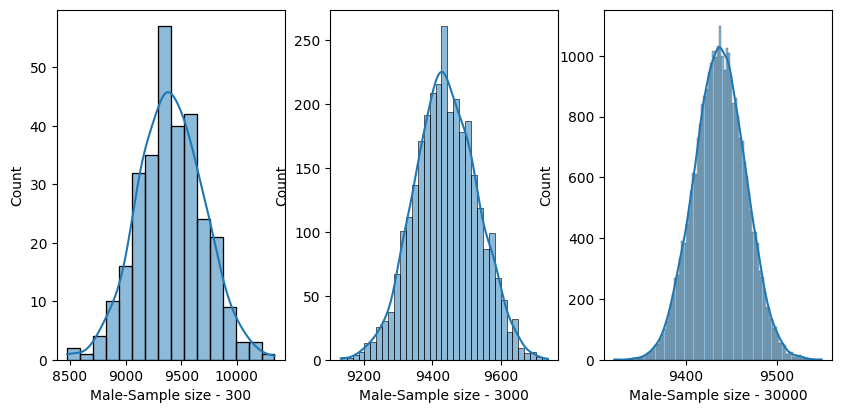

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.xlabel('Male-Sample size - 300')
sns.histplot(sample_300, kde=True)
plt.subplot(2,3,2)
plt.xlabel('Male-Sample size - 3000')
sns.histplot(sample_3000, kde=True)
plt.subplot(2,3,3)
plt.xlabel('Male-Sample size - 30000')
sns.histplot(sample_30000, kde=True)

From the above 3 plots we can see as the sample size increase the spread is decreased and atlast formed the normal distribution at big sample size

***************************************************************************************************************************************************************

**Bootstrap Analysis for 300  - Male**

In [ ]:
n1 = 300
bootstrapped_means_survey_300 = []
for reps in range(300):
    bootstrapped_samples_300 = np.random.choice(sample_300, size=n1)
    bootstrapped_mean_300 = np.mean(bootstrapped_samples_300)
    bootstrapped_means_survey_300.append(bootstrapped_mean_300)

In [ ]:
np.mean(bootstrapped_samples_300)

9434.051466666668

we can observe that in bootstrapped_means_survey_300 , the interval between 9420 and 9500 using bootstrap method of sampling


In [ ]:
len(bootstrapped_means_survey_300)

300

In [ ]:
#find the 95% confident interval using bootstrap
x1 = np.percentile(bootstrapped_means_survey_300, 2.5)
x2 = np.percentile(bootstrapped_means_survey_300, 97.5)
print(x1,x2)

9432.915756944443 9497.983145



95% Confidence Interval of purchase amount for males using bootstrap for 300 samples = (9432.16,9497.79)

**Bootstrap Analysis for 3000 - Male**

In [ ]:
sample_3000 = [np.mean(df_M_Puramt.sample(3000)) for i in range(3000) ]

In [ ]:
n2 = 3000
bootstrapped_means_survey_3000 = []
for reps in range(3000):
    bootstrapped_samples_3000 = np.random.choice(sample_3000, size=n2)
    bootstrapped_mean_3000 = np.mean(bootstrapped_samples_3000)
    bootstrapped_means_survey_3000.append(bootstrapped_mean_3000)

In [ ]:
np.mean(bootstrapped_samples_3000)

9441.54740888889

In [ ]:
#find the 95% confident interval using bootstrap from the sample of 3000
x1 = np.percentile(bootstrapped_means_survey_3000, 2.5)
x2 = np.percentile(bootstrapped_means_survey_3000, 97.5)
print(x1,x2)

9436.23685601111 9442.771523722224


9436.306886408333 9442.846136966667

In [ ]:
len(bootstrapped_means_survey_3000)

3000

**Bootstrap Analysis for 30000 - Male**

In [ ]:
sample_30000 = [np.mean(df_M_Puramt.sample(30000)) for i in range(30000) ]

In [ ]:
n3 = 30000
bootstrapped_means_survey_30000 = []
for reps in range(30000):
    bootstrapped_samples_30000 = np.random.choice(sample_30000, size=n3)
    bootstrapped_mean_30000 = np.mean(bootstrapped_samples_30000)
    bootstrapped_means_survey_30000.append(bootstrapped_mean_30000)

In [ ]:
#find the 95% confident interval using bootstrap from the sample of 3000
x1 = np.percentile(bootstrapped_means_survey_30000, 2.5)
x2 = np.percentile(bootstrapped_means_survey_30000, 97.5)
print(x1,x2)

9437.240006663193 9437.883615725696


<Axes: ylabel='Count'>

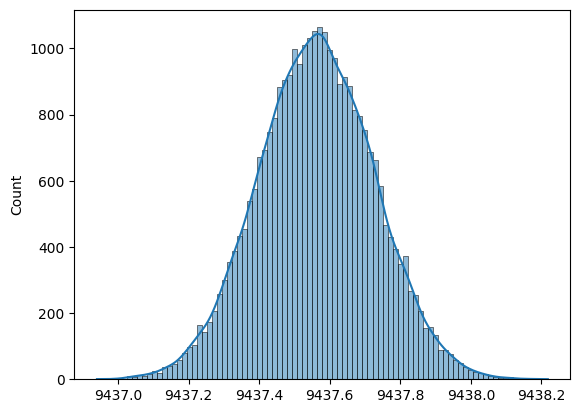

In [ ]:
sns.histplot(bootstrapped_means_survey_30000, kde=True)

In [ ]:
df_Female=df[df['Gender']=='F']
df_Female.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase_Amount
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [ ]:
df_F_Puramt=df_Female['Purchase_Amount']

In [ ]:
df_Female.shape

(135809, 10)

<Axes: xlabel='Purchase_Amount', ylabel='Count'>

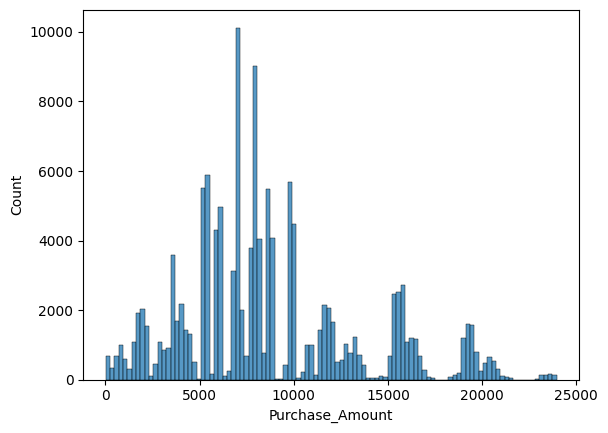

In [ ]:
#distribution of puachase amount by Females
sns.histplot(df_F_Puramt)

In [ ]:
# mean of the entire population
mu1 = df_F_Puramt.mean()
mu1

8734.565765155476

In [ ]:
# mean of the entire population
sigma1 = df_F_Puramt.std()
sigma1

4767.233289291458

**CLT for sample size 300 - Female**

In [ ]:
n1=300
Fstd_error1 = sigma1/np.sqrt(n1)
print(Fstd_error1)
norm.interval(0.95, loc = mu, scale=Fstd_error1)


275.2363422862168


(8898.072722354742, 9976.979358589788)

**CLT for sample size 3000 - Female**

In [ ]:
n2=3000
Fstd_error2 = sigma1/np.sqrt(n2)
print(Fstd_error2)
norm.interval(0.95, loc = mu, scale=Fstd_error2)

87.0373736478161


(9266.935922813589, 9608.11615813094)

**CLT for sample size 30000 - Female**

In [ ]:
n3=30000
Fstd_error3 = sigma1/np.sqrt(n3)
print(Fstd_error3)
norm.interval(0.95, loc = mu, scale=Fstd_error3)

27.523634228621685


(9383.580708660513, 9491.471372284017)

In [ ]:
F_sample_300 = [np.mean(df_F_Puramt.sample(300)) for i in range(300) ]

In [ ]:
F_sample_3000 = [np.mean(df_F_Puramt.sample(3000)) for i in range(3000) ]

In [ ]:
F_sample_30000 = [np.mean(df_F_Puramt.sample(30000)) for i in range(30000) ]

<Axes: xlabel='Purchase_Amount', ylabel='Count'>

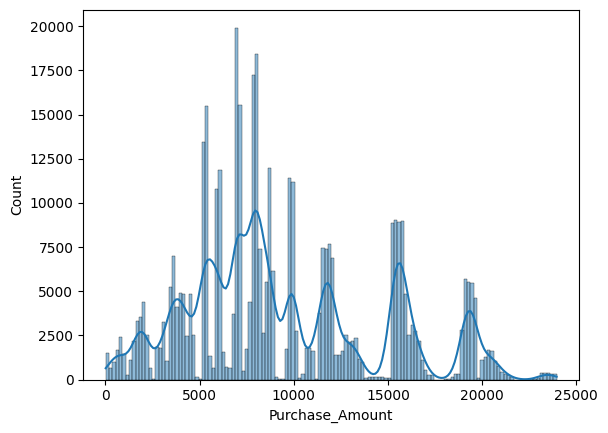

In [ ]:
sns.histplot(df_M_Puramt, kde=True)

<Axes: xlabel='Female-Sample size - 30000', ylabel='Count'>

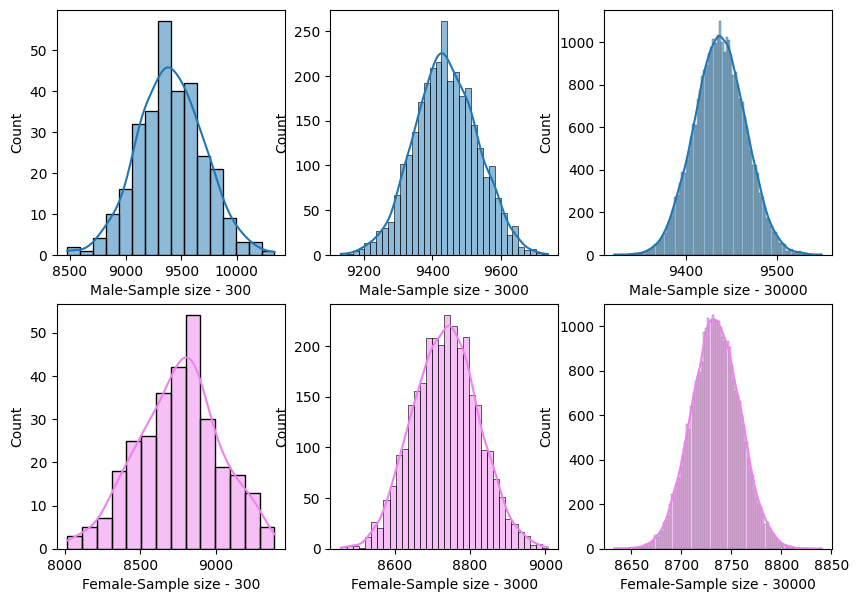

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.subplot(2,3,1)
plt.xlabel('Male-Sample size - 300')
sns.histplot(sample_300, kde=True)
plt.subplot(2,3,2)
plt.xlabel('Male-Sample size - 3000')
sns.histplot(sample_3000, kde=True)
plt.subplot(2,3,3)
plt.xlabel('Male-Sample size - 30000')
sns.histplot(sample_30000, kde=True)

plt.subplot(2,3,4)
plt.xlabel('Female-Sample size - 300')
sns.histplot(F_sample_300, kde=True,color='violet')
plt.subplot(2,3,5)
plt.xlabel('Female-Sample size - 3000')
sns.histplot(F_sample_3000, kde=True,color='violet')
plt.subplot(2,3,6)
plt.xlabel('Female-Sample size - 30000')
sns.histplot(F_sample_30000, kde=True,color='violet')

In [ ]:
print(mu,mu1)

9437.526040472265 9437.526040472265


From the above plots we can infer below insights

1.   4.a.i   confidence interval computed using the entire dataset is wider for Male than the female,since the number of purchase done by male is higher than the female
2.   4.a.ii.   The width of the confidence interval is narrowed as the size increased.
3.   4.a.iii. Yes ,we can see the confidence interval is keep on overlap as the sample size increase.

4.  4.a.iv. The distribution of the male purchase is right skewed at first and as the sample size increase and after the CLT process done,at the end we can see it is normally distributed

5. Male are only spending more money than the female  









7.a.confidence intervals for the average amount spent by males and females (computed using all the data) is not overlapping for higher sample size

**5.Age affect the amount spent**

In [ ]:
df_married=df[df['Marital_Status']==1]
df_married.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase_Amount
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254


In [ ]:
df_married.shape

(225337, 10)

In [ ]:
Married_Puramt=df_married['Purchase_Amount']

In [ ]:
# mean of the entire population -married
mu_m = Married_Puramt.mean()
mu_m

9261.174574082374

In [ ]:

# SD of the entire population -married
sigma_m = Married_Puramt.std()
sigma_m

5016.897377793055

**CLT for sample size 300 - Married**

In [ ]:
n1=300
std_error_m1 = sigma_m/np.sqrt(n1)
print(std_error_m1)
norm.interval(0.95, loc = mu_m, scale=std_error_m1)

289.65070515655475


(8693.469623878897, 9828.87952428585)

**CLT for sample size 3000 - Married**

In [ ]:
n2=3000
std_error_m2 = sigma_m/np.sqrt(n2)
print(std_error_m2)
norm.interval(0.95, loc = mu_m, scale=std_error_m2)

91.59559541685911


(9081.650505922828, 9440.69864224192)

**CLT for sample size 30000 - Married**

In [ ]:
n3=30000
std_error_m3 = sigma_m/np.sqrt(n3)
print(std_error_m3)
norm.interval(0.95, loc = mu_m, scale=std_error_m3)

28.96507051565548


(9204.404079062026, 9317.945069102721)

In [ ]:
df_Unmarried=df[df['Marital_Status']==0]
df_Unmarried.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase_Amount
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df_Unmarried.shape

(324731, 10)

In [ ]:
Unmarried_Puramt=df_Unmarried['Purchase_Amount']

In [ ]:
# mean of the entire population -Unmarried
mu_un = Unmarried_Puramt.mean()
mu_un

9265.907618921507

In [ ]:
# SD of the entire population -Unmarried
sigma_un = Unmarried_Puramt.std()
sigma_un

5027.347858674449

**CLT for sample size 300 - Unmarried**

In [ ]:
n1=300
std_error_un1 = sigma_un/np.sqrt(n1)
print(std_error_un1)
norm.interval(0.95, loc = mu_un, scale=std_error_un1)

290.2540639515581


(8697.020107210066, 9834.795130632947)

**CLT for sample size 3000 - Unmarried**

In [ ]:
n2=3000
std_error_un2 = sigma_un/np.sqrt(n2)
print(std_error_un2)
norm.interval(0.95, loc = mu_un, scale=std_error_un2)

91.78639422070964


(9086.00959197812, 9445.805645864893)

**CLT for sample size 30000 - Unmarried**

In [ ]:
n3=30000
std_error_un3 = sigma_un/np.sqrt(n3)
print(std_error_un3)
norm.interval(0.95, loc = mu_un, scale=std_error_un3)

29.025406395155816


(9209.018867750363, 9322.79637009265)

In [ ]:
Marr_sample_300 = [np.mean(Married_Puramt.sample(300)) for i in range(300) ]

In [ ]:
Marr_sample_3000 = [np.mean(Married_Puramt.sample(3000)) for i in range(3000) ]

In [ ]:
Marr_sample_30000 = [np.mean(Married_Puramt.sample(30000)) for i in range(30000) ]

In [ ]:
Unmarr_sample_300 = [np.mean(Unmarried_Puramt.sample(300)) for i in range(300) ]

In [ ]:
Unmarr_sample_3000 = [np.mean(Unmarried_Puramt.sample(3000)) for i in range(3000) ]

In [ ]:
Unmarr_sample_30000 = [np.mean(Unmarried_Puramt.sample(30000)) for i in range(30000) ]

<Axes: xlabel='Purchase_Amount', ylabel='Count'>

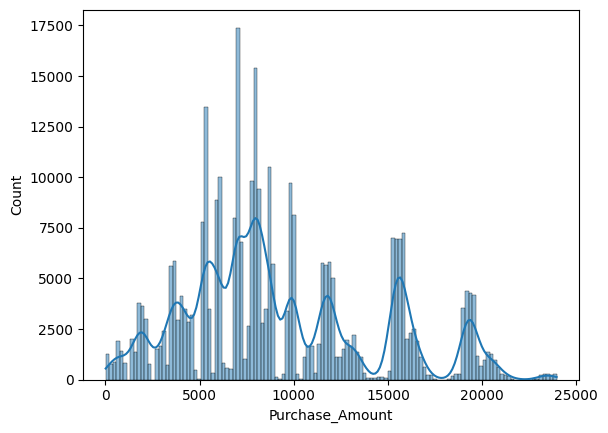

In [ ]:
sns.histplot(Unmarried_Puramt, kde=True)

<Axes: xlabel='Unmarried-Sample size - 30000', ylabel='Count'>

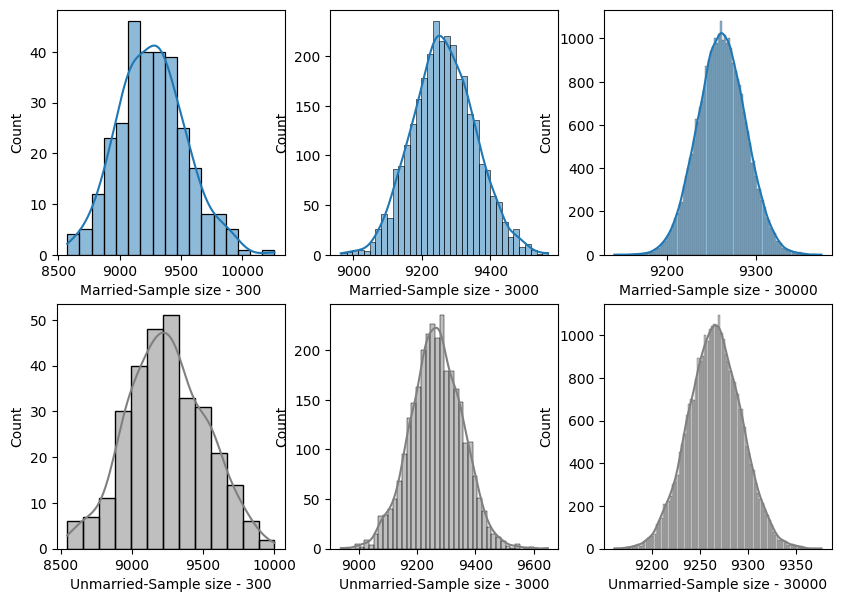

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.subplot(2,3,1)
plt.xlabel('Married-Sample size - 300')
sns.histplot(Marr_sample_300, kde=True)
plt.subplot(2,3,2)
plt.xlabel('Married-Sample size - 3000')
sns.histplot(Marr_sample_3000, kde=True)
plt.subplot(2,3,3)
plt.xlabel('Married-Sample size - 30000')
sns.histplot(Marr_sample_30000, kde=True)

plt.subplot(2,3,4)
plt.xlabel('Unmarried-Sample size - 300')
sns.histplot(Unmarr_sample_300, kde=True,color='gray')
plt.subplot(2,3,5)
plt.xlabel('Unmarried-Sample size - 3000')
sns.histplot(Unmarr_sample_3000, kde=True,color='gray')
plt.subplot(2,3,6)
plt.xlabel('Unmarried-Sample size - 30000')
sns.histplot(Unmarr_sample_30000, kde=True,color='gray')

From the above plots we can infer the effect of martial status on amount spenting


1.   5.a.i   confidence interval computed using the entire dataset is wider for Unmarried than the married,since the number of purchase done by Unmarried is higher than the married
2.   5.a.ii.   The width of the confidence interval is narrowed as the size increased.
3.   5.a.iii. Yes ,we can see the confidence interval is keep on overlap as the sample size increase.

4.  5.a.iv. The distribution of the Unmarried purchase is right skewed at first and as the sample size increase and after the CLT process done,at the end we can see it is normally distributed

5. Unmarried are only spending more money than the married  




7.b.confidence intervals for the average amount spent by married and unmarried (computed using all the data) is  overlapping for higher sample size

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase_Amount
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
Teen=df[df['Age']=='0-17']
Teen.head()
Young=df[df['Age']=='18-25']
Young.head()
adults=df[df['Age']=='26-35']
adults.head()
middle_aged=df[df['Age']=='36-45']
middle_aged.head()
Senior_Adult=df[df['Age']=='46-50']
Senior_Adult.head()
aged=df[df['Age']=='51-55']
aged.head()
old=df[df['Age']=='55+']
old.head()

In [ ]:
Teen_amt=Teen['Purchase_Amount']
Young_amt=Young['Purchase_Amount']
adults_amt=adults['Purchase_Amount']
middle_aged_amt=middle_aged['Purchase_Amount']
Senior_Adult_amt=Senior_Adult['Purchase_Amount']
aged_amt=aged['Purchase_Amount']
old_amt=old['Purchase_Amount']

In [ ]:
Teen_sample_300 = [np.mean(Teen_amt.sample(300)) for i in range(300) ]
Young_sample_300 = [np.mean(Young_amt.sample(300)) for i in range(300) ]
adults_sample_300 = [np.mean(adults_amt.sample(300)) for i in range(300) ]
middle_aged_sample_300 = [np.mean(middle_aged_amt.sample(300)) for i in range(300) ]
Senior_Adult_sample_300 = [np.mean(Senior_Adult_amt.sample(300)) for i in range(300) ]
aged_sample_300 = [np.mean(aged_amt.sample(300)) for i in range(300) ]
old_sample_300 = [np.mean(old_amt.sample(300)) for i in range(300) ]

In [ ]:
Teen_sample_3000 = [np.mean(Teen_amt.sample(3000)) for i in range(3000) ]
Young_sample_3000 = [np.mean(Young_amt.sample(3000)) for i in range(3000) ]
adults_sample_3000 = [np.mean(adults_amt.sample(3000)) for i in range(3000) ]
middle_aged_sample_3000 = [np.mean(middle_aged_amt.sample(3000)) for i in range(3000) ]
Senior_Adult_sample_3000 = [np.mean(Senior_Adult_amt.sample(3000)) for i in range(3000) ]
aged_sample_3000 = [np.mean(aged_amt.sample(3000)) for i in range(3000) ]
old_sample_3000 = [np.mean(old_amt.sample(3000)) for i in range(3000) ]

<Axes: xlabel='old_sample_300', ylabel='Count'>

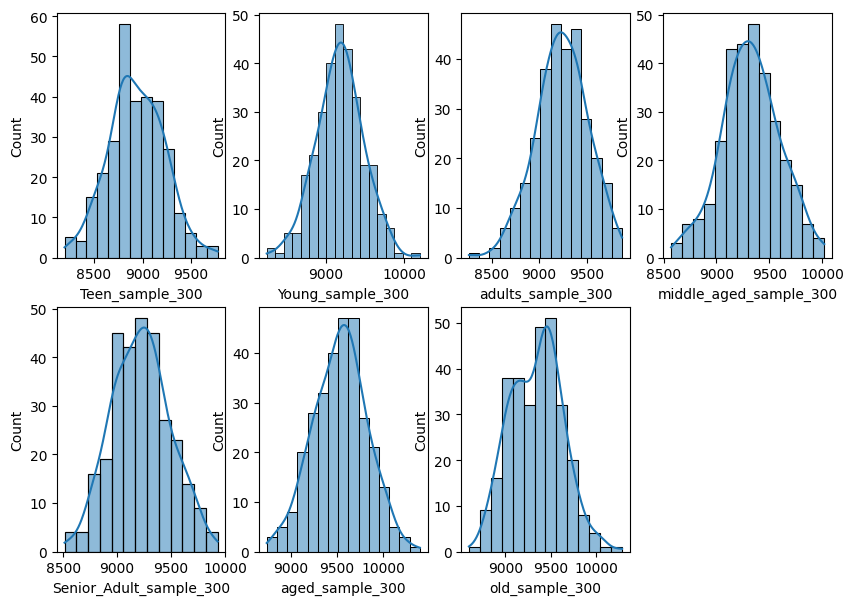

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.subplot(2,4,1)
plt.xlabel('Teen_sample_300')
sns.histplot(Teen_sample_300, kde=True)
plt.subplot(2,4,2)
plt.xlabel('Young_sample_300')
sns.histplot(Young_sample_300, kde=True)
plt.subplot(2,4,3)
plt.xlabel('adults_sample_300')
sns.histplot(adults_sample_300, kde=True)
plt.subplot(2,4,4)
plt.xlabel('middle_aged_sample_300')
sns.histplot(middle_aged_sample_300, kde=True)
plt.subplot(2,4,5)
plt.xlabel('Senior_Adult_sample_300')
sns.histplot(Senior_Adult_sample_300, kde=True)
plt.subplot(2,4,6)
plt.xlabel('aged_sample_300')
sns.histplot(aged_sample_300, kde=True)
plt.subplot(2,4,7)
plt.xlabel('old_sample_300')
sns.histplot(old_sample_300, kde=True)

<Axes: xlabel='old_sample_3000', ylabel='Count'>

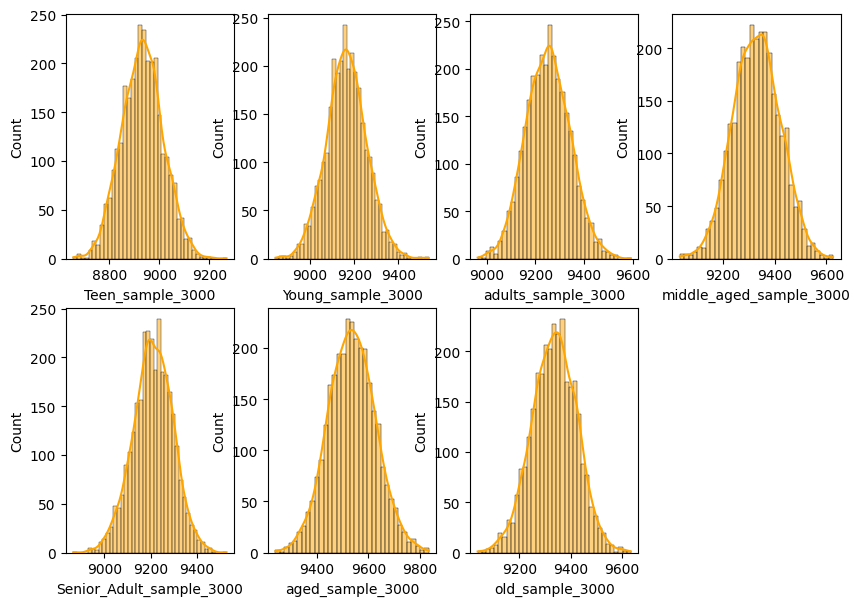

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.subplot(2,4,1)
plt.xlabel('Teen_sample_3000')
sns.histplot(Teen_sample_3000, kde=True,color='orange')
plt.subplot(2,4,2)
plt.xlabel('Young_sample_3000')
sns.histplot(Young_sample_3000, kde=True,color='orange')
plt.subplot(2,4,3)
plt.xlabel('adults_sample_3000')
sns.histplot(adults_sample_3000, kde=True,color='orange')
plt.subplot(2,4,4)
plt.xlabel('middle_aged_sample_3000')
sns.histplot(middle_aged_sample_3000, kde=True,color='orange')
plt.subplot(2,4,5)
plt.xlabel('Senior_Adult_sample_3000')
sns.histplot(Senior_Adult_sample_3000, kde=True,color='orange')
plt.subplot(2,4,6)
plt.xlabel('aged_sample_3000')
sns.histplot(aged_sample_3000, kde=True,color='orange')
plt.subplot(2,4,7)
plt.xlabel('old_sample_3000')
sns.histplot(old_sample_3000, kde=True,color='orange')

From the above plots we can infer the effect of age on amount spenting


1.   6.a.i   confidence interval computed using the entire dataset is wider for adult(26 to 35) than the all ages,since the number of purchase done by adult(26 to 35) is higher than the all ages
2.   6.a.ii.   The width of the confidence interval is narrowed as the size increased.
3.   6.a.iii. Yes ,we can see the confidence interval is keep on overlap as the sample size increase.

5. adult(26 to 35)  are only ages spending more money than the all ages  

6.   From the above graph we can the spread for adult people,that is between 26 to 35 is very high,means these people spent more money
7.   From the above graph we can the spread for teen people,that is age below 7 is very low,means these people spent less money



7.c.confidence intervals for the average amount spent by different ages (computed using all the data) is  overlapping for higher sample size


Recommendations


1.   It is showing 50% of the customer's purchase amount is between 5000 and
     12000.
2.   It is showing 50% of the customer purchased the product category between 1 and 8.And product category 19 & 20 are the outliers
3.   It is showing 50% of the customer's occupation is 2 and 14.
4.   we can clearly see product category 1,5,8 are the most purchased product category.And the majority of the customers are in the age between 26 to 35
5.   Unmarried are only spending more money than the married
6.   adult(26 to 35)  are only ages spending more money frthan the all ages
7.   Male are only spending more money than the female



